In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
anime_basics = pd.read_csv('epsilon_work_3.csv')
popularity_details = pd.read_csv('epsilon_work_1.csv')
revenue_streaming = pd.read_csv('epsilon_work_2.csv')

# Merge datasets on "Anime ID"
merged_df = anime_basics.merge(popularity_details, on="Anime ID", how="inner")
merged_df = merged_df.merge(revenue_streaming, on="Anime ID", how="inner")

# Rename columns for consistency
merged_df.rename(columns={
    "Title": "Anime Name",
    "Airing_Start": "Airing Start Date",
    "Streaming revenues": "Streaming Revenue",
    "Merchandise revenue": "Merchandise Revenue",
    "Streaming Cost": "Streaming Cost",
    "Streaming Platform": "Streaming Platforms",
    "Countries Available": "Countries Available",
    "Score": "Score",
    "Favorites": "Favorites",
    "Members": "Members",
    "Total revenues": "Total Revenue"
}, inplace=True)


In [ ]:
merged_df.drop(columns=["Title_x","Title_y","Countries Available_y","Awards Won_y","Streaming Platform_y"], inplace=True)
merged_df.columns

In [ ]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Anime ID               5374 non-null   int64  
 1   Producers              5374 non-null   object 
 2   Streaming Platform_x   5374 non-null   object 
 3   Genre                  5374 non-null   object 
 4   Type                   5374 non-null   object 
 5   Studio                 5374 non-null   object 
 6   Source                 5374 non-null   object 
 7   A/R Ratings            5374 non-null   object 
 8   Members                5374 non-null   object 
 9   Favorites              5374 non-null   int64  
 10  Airing Start Date      5374 non-null   object 
 11  Airing_End             5374 non-null   object 
 12  Episodes               5374 non-null   int64  
 13  Duration               5374 non-null   float64
 14  Broadcast_Day          5374 non-null   object 
 15  Watc

In [ ]:
merged_df.head()

In [ ]:
# Convert necessary columns to numeric format
cols_to_numeric = ["Members","Streaming Revenue","Merchandise Revenue","Streaming Cost","Total Revenue",
                   "Merchandise Revenue","Production Budget","Watch Hours"]
for i in cols_to_numeric:
    try:
        merged_df[i]  = merged_df[i].str.replace("$", "").str.replace(",", "").str.replace("#REF!","0").astype(float)
        print(f"Converted {i} to numeric")
        #merged_df[i] = pd.to_numeric(merged_df[i].str.replace("$", "").str.replace(",", ""), errors="coerce")
    except:
        print(f"Could not convert {i} to numeric")

#merged_df["Merchandise Revenue"] = merged_df["Merchandise Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
#merged_df["Streaming Cost"] = merged_df["Streaming Cost"].str.replace("$", "").str.replace(",", "").astype(float)
#merged_df["Total Revenue"] = merged_df["Total Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
#merged_df["Merchandise Revenue"] = merged_df["Merchandise Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
#merged_df["Production Budget"] = merged_df["Production Budget"].str.replace("$", "").str.replace(",", "").astype(float)
#merged_df["Watch Hours"] = merged_df["Watch Hours"].str.replace("$", "").str.replace(",", "").astype(float)

# Convert airing start date to datetime format
merged_df["Airing Start Date"] = pd.to_datetime(merged_df["Airing Start Date"], errors="coerce")


<h3>ANIME X <h3>

In [ ]:
# Define constraints
member_threshold = 10.5 * 10**5  # 10.5 Lakh members
total_budget = 700 * 10**7  # 700 Crores (7 Billion)

# Calculate Net Revenue (Revenue - Streaming Cost)
merged_df["Net Revenue"] = merged_df["Total Revenue"] - merged_df["Streaming Cost"]

# Calculate the number of streaming platforms

def find(s):
    y=['Crunchyroll','Amazon Prime','Hulu','Youtube','Youtube Premium','HBO Max','Disney+','AppleTV+','Netflix','VRV','Tubi','Funimation']
    count=0
    for i in y:
        if i in s:
            count+=1
    return count
merged_df["Streaming count"] = merged_df["Streaming Platform_x"].apply(find)
#merged_df["Streaming Count"] = merged_df["Streaming Count"].str.replace("$", "").str.replace(",", "").astype(float)




# Apply filtering conditions
filtered_anime = merged_df[
    (merged_df["Members"] < member_threshold) &  # Less than 10.5 Lakh members
    (merged_df["Airing Start Date"] < "2010-01-01") &  # Older anime
    ((merged_df["Score"] < 7.0) | (merged_df["Favorites"] < 5000)) &  # Low score or low favorites
    ((merged_df["Streaming Revenue"] + merged_df["Merchandise Revenue"]) > 10**7) &  # High revenue potential
    (merged_df["Streaming count"] < 2) &  # At most 2 streaming platforms
    (merged_df["Countries Available_x"] < 15)  # Available in less than 15 countries
]

# Sort by highest Net Revenue for optimization
filtered_anime = filtered_anime.sort_values(by="Net Revenue", ascending=False)

# Select anime that fit within the total budget
filtered_anime["Cumulative Streaming Cost"] = filtered_anime["Streaming Cost"].cumsum()
selected_anime_budget = filtered_anime[filtered_anime["Cumulative Streaming Cost"] <= total_budget]

# Save the result as CSV
selected_anime_budget.to_csv("Optimized_Anime_List11.csv", index=False)
print("Optimized anime list saved as 'Optimized_Anime_List11.csv'.")




Optimized anime list saved as 'Optimized_Anime_List11.csv'.


<h3>ANIME Y</H3>

In [ ]:
# Calculate Net Revenue (Revenue - Streaming Cost)
merged_df["Net Revenue"] = merged_df["Total Revenue"] - merged_df["Streaming Cost"]


# Apply filtering conditions
filtered_anime_y = merged_df[
    (merged_df["Awards Won_x"] > 0) &  # High number of awards
    (merged_df["Score"] > 8.0) &  # High score
    (merged_df["User_Reviews"] > 10000) &  # High user views
    (merged_df["Favorites"] > 25000) &  # High favorite count
    (merged_df["Members"] > 100000) &  # High membership count
    (merged_df["Watch Hours"] > 500000) &  # High watch hours
    (merged_df["Merchandise Revenue"] > 10**7) &  # Strong merchandise sale
    (merged_df["Dub Availability"] == "Yes") &  # Dub availability
    (merged_df["Countries Available_x"] > 15) &  # Available in more than 15 countries
    (merged_df["Episodes"] > 50) &  # Huge number of episodes
    (merged_df["Duration"] > 20)  # Long episode duration
]

# Sort by highest Net Revenue for optimization
filtered_anime_y = filtered_anime_y.sort_values(by="Net Revenue", ascending=False)

# Select anime that fit within the total budget
filtered_anime_y["Cumulative Streaming Cost0"] = filtered_anime_y["Streaming Cost"].cumsum()
selected_anime_budget0 = filtered_anime_y[filtered_anime_y["Cumulative Streaming Cost0"] <= total_budget]

# Save the result as CSV
selected_anime_budget0.to_csv("Optimized_Anime_List2.csv", index=False)
print("Optimized anime list saved as 'Optimized_Anime_List2.csv'.")

Optimized anime list saved as 'Optimized_Anime_List2.csv'.


In [ ]:
# Calculate profit
merged_df["Profit"] = merged_df["Total Revenue"] - merged_df["Streaming Cost"]

# Calculate profit margin
merged_df["Profit Margin"] = (merged_df["Profit"] / merged_df["Total Revenue"]) * 100

# Calculate average profit margin
average_profit_margin = merged_df["Profit Margin"].mean()

# Calculate average profit
average_profit = merged_df["Profit"].mean()

# Calculate average revenue
average_revenue = merged_df["Total Revenue"].mean()

# Calculate average streaming revenue
average_streaming_revenue = merged_df["Streaming Revenue"].mean()

# Calculate average merchandise revenue
average_merchandise_revenue = merged_df["Merchandise Revenue"].mean()

# Calculate average streaming cost
average_streaming_cost = merged_df["Streaming Cost"].mean()

# Calculate average score
average_score = merged_df["Score"].mean()

C:\Users\dell\AppData\Local\Temp\ipykernel_488\2165095349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=selected_anime_budget["Genre"], order=selected_anime_budget["Genre"].value_counts().index, palette="coolwarm")


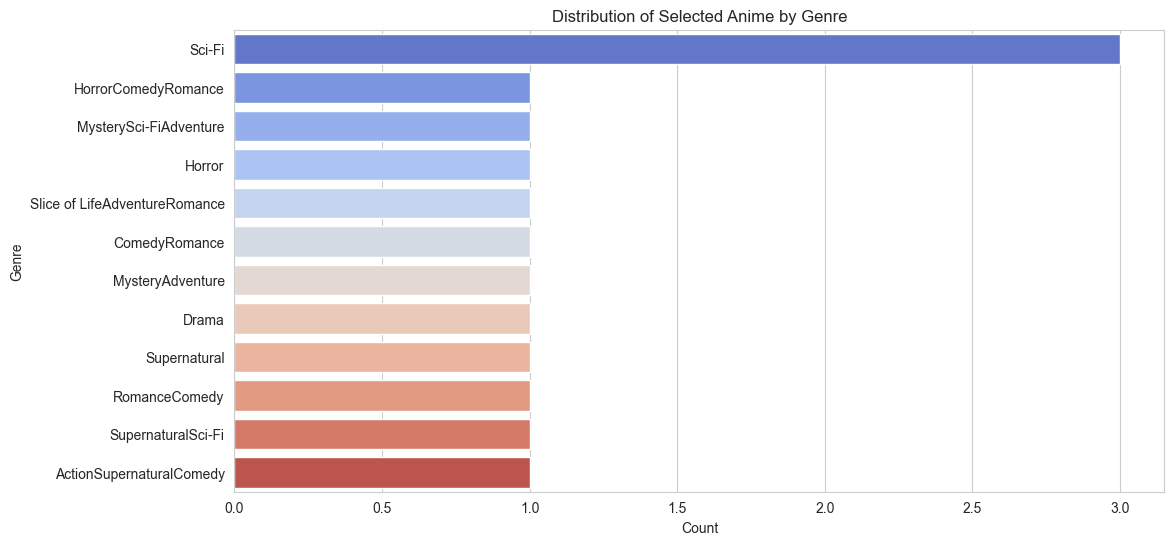

C:\Users\dell\AppData\Local\Temp\ipykernel_488\2165095349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=selected_anime_budget["A/R Ratings"], y=selected_anime_budget["Net Revenue"], palette="pastel")


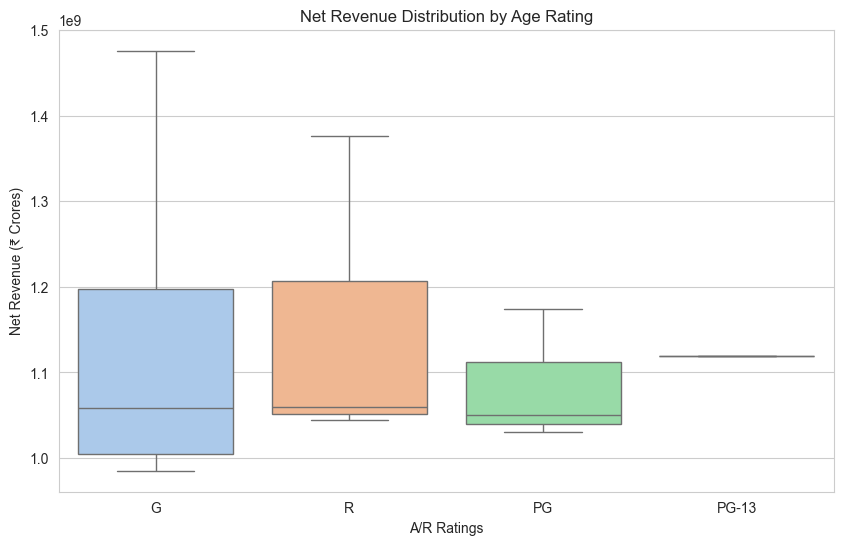

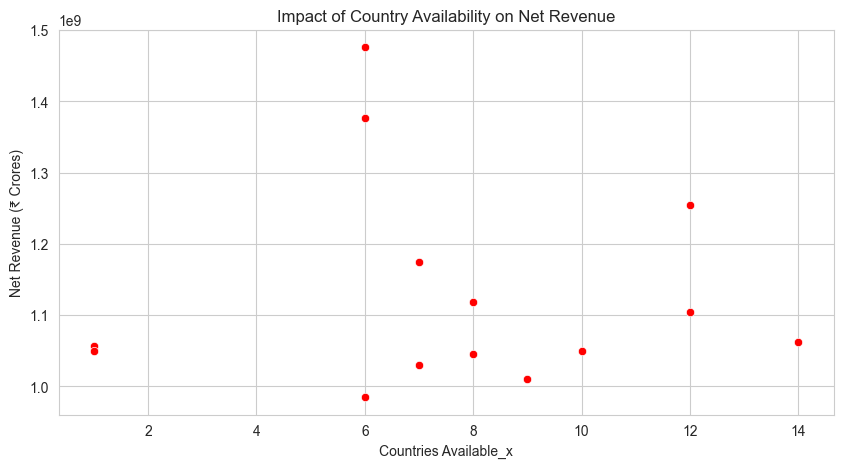

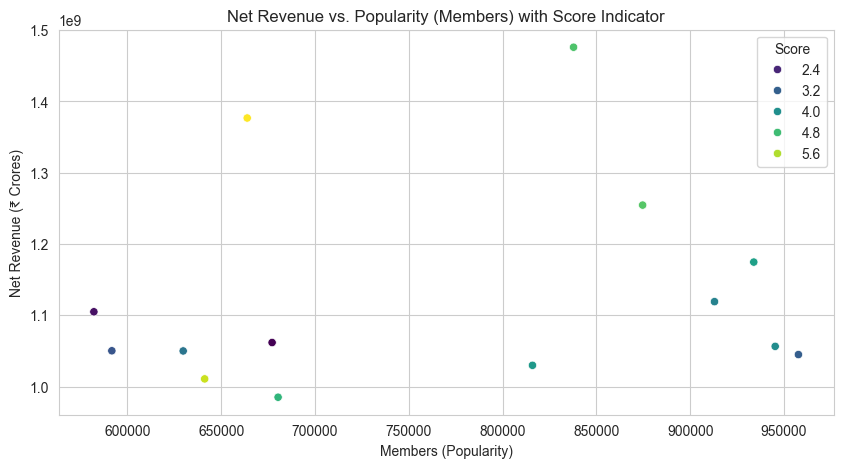

In [ ]:
# Visualization
sns.set_style("whitegrid")

# Genre Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=selected_anime_budget["Genre"], order=selected_anime_budget["Genre"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Distribution of Selected Anime by Genre")
plt.show()

# Age Rating vs. Net Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_anime_budget["A/R Ratings"], y=selected_anime_budget["Net Revenue"], palette="pastel")
plt.xlabel("A/R Ratings")
plt.ylabel("Net Revenue (₹ Crores)")
plt.title("Net Revenue Distribution by Age Rating")
plt.show()

# Streaming Platforms Preference
#plt.figure(figsize=(10, 5))
#selected_anime_budget["Streaming Count"].plot(kind="bar", color="skyblue")
#plt.xlabel("Streaming Count")
#plt.ylabel("Count of Anime")
#plt.title("Most Preferred Streaming Platforms for Selected Anime")
#plt.xticks(rotation=45)
#plt.show()

# Country Availability vs. Revenue
plt.figure(figsize=(10, 5))
sns.scatterplot(x=selected_anime_budget["Countries Available_x"], y=selected_anime_budget["Net Revenue"], color="red")
plt.xlabel("Countries Available_x")
plt.ylabel("Net Revenue (₹ Crores)")
plt.title("Impact of Country Availability on Net Revenue")
plt.show()

# Net Revenue vs. Popularity (Members)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=selected_anime_budget["Members"], y=selected_anime_budget["Net Revenue"], hue=selected_anime_budget["Score"], palette="viridis")
plt.xlabel("Members (Popularity)")
plt.ylabel("Net Revenue (₹ Crores)")
plt.title("Net Revenue vs. Popularity (Members) with Score Indicator")
plt.legend(title="Score")
plt.show()